# QMSS5074GR - Final Project (3rd)


### Your Grp ID: G_10
### Your UNIs: LC3913, WX3028, BS3579
### Your Full Names: Lizhi Cao, Xiaoyi Wang, Boyan Sun
### Public GitHub Repo:
Lizhi Cao: https://github.com/lizziecao/QMSS_Advanced_ML

Xiaoyi Wang: https://github.com/SoyaWang/QMSSGR5074_001_2025_1---PROJECTS-IN-ADVANCED-MACHINE-LEARNING

Boyan Sun: https://github.com/kakaby/Projects-in-Machine-Learning

## Description

## Part 1 – Data Ingestion & Preprocessing

1. **Data Loading**  
   - Acquire the Stanford Sentiment Treebank dataset.  
   - Split into training, validation and test sets with stratified sampling to preserve class balance.  
   - Clearly document your splitting strategy and resulting dataset sizes.

2. **Text Cleaning & Tokenization**  
   - Implement a reusable preprocessing pipeline that handles at least:  
     - HTML removal, lowercasing, punctuation stripping  
     - Vocabulary pruning (e.g., rare words threshold)  
     - Tokenization (character- or word-level)  
   - Expose this as a function/class so it can be saved and re-loaded for inference.

3. **Feature Extraction**  
   - **Traditional**: Build a TF-IDF vectorizer (or n-gram count) pipeline.  
   - **Neural**: Prepare sequences for embedding—pad/truncate to a fixed length.  
   - Save each preprocessor (vectorizer/tokenizer) to disk.

---

## Part 2 – Exploratory Data Analysis (EDA)

1. **Class Distribution**  
   - Visualize the number of positive vs. negative reviews.  
   - Compute descriptive statistics on review lengths (mean, median, IQR).  

2. **Text Characteristics**  
   - Plot the 20 most frequent tokens per sentiment class.  
   - Generate word clouds (or bar charts) highlighting key terms for each class.  

3. **Correlation Analysis**  
   - Analyze whether review length correlates with sentiment.  
   - Present findings numerically and with at least one visualization.

---

## Part 3 – Baseline Traditional Models

1. **Logistic Regression & SVM**  
   - Train at least two linear models on your TF-IDF features (e.g., logistic regression, linear SVM).  
   - Use cross-validation (≥ 5 folds) on the training set to tune at least one hyperparameter.  

2. **Random Forest & Gradient Boosting**  
   - Train two tree-based models (e.g., Random Forest, XGBoost) on the same features.  
   - Report feature-importance for each and discuss any notable tokens.

3. **Evaluation Metrics**  
   - Compute accuracy, precision, recall, F1-score, and ROC-AUC on the **held-out test set**.  
   - Present all results in a single comparison table.

---

## Part 4 – Neural Network Models

1. **Simple Feed-Forward**  
   - Build an embedding layer + a dense MLP classifier.  
   - Ensure you freeze vs. unfreeze embeddings in separate runs.

2. **Convolutional Text Classifier**  
   - Implement a 1D-CNN architecture (Conv + Pooling) for sequence data.  
   - Justify your choice of kernel sizes and number of filters.

3. **Recurrent Model (Optional)**  
   - (Stretch) Add an RNN or Bi-LSTM layer and compare performance/time vs. CNN.

---

## Part 5 – Transfer Learning & Advanced Architectures

1. **Pre-trained Embeddings**  
   - Retrain one network using pre-trained GloVe (or FastText) embeddings.  
   - Compare results against your from-scratch embedding runs.

2. **Transformer Fine-Tuning**  
   - Fine-tune a BERT-family model on the training data.  
   - Clearly outline your training hyperparameters (learning rate, batch size, epochs).


---

## Part 6 – Hyperparameter Optimization

1. **Search Strategy**  
   - Use a library (e.g., Keras Tuner, Optuna) to optimize at least two hyperparameters of one deep model.  
   - Describe your search space and stopping criteria.

2. **Results Analysis**  
   - Report the best hyperparameter configuration found.  
   - Plot validation-loss (or metric) vs. trials to illustrate tuning behavior.

---

## Part 7 – Final Comparison & Error Analysis

1. **Consolidated Results**  
   - Tabulate test-set performance for **all** models (traditional, neural, transfer-learned).  
   - Highlight top‐performing model overall and top in each category.

2. **Statistical Significance**  
   - Perform a significance test (e.g., McNemar’s test) between your best two models.  

3. **Error Analysis**  
   - Identify at least 20 examples your best model misclassified.  
   - For a sample of 5, provide the raw text, predicted vs. true label, and a short discussion of each error—what linguistic artifact might have confused the model?

---

## Part 8 – Optional Challenge Extensions

- Implement data augmentation for text (back-translation, synonym swapping) and measure its impact.  
- Integrate a sentiment lexicon feature (e.g., VADER scores) into your models and assess whether it improves predictions.  
- Deploy your best model as a simple REST API using Flask or FastAPI and demo it on a handful of user‐submitted reviews.

---

## Start coding .....

ps. the code below is just an filler code with some tips on the top it.


But the main project requirements are listed above in the description.

## Part 1 – Data Ingestion & Preprocessing


1. **Data Loading**  
    - Acquire the Stanford Sentiment Treebank dataset.
    - Split into training, validation, and test sets with stratified sampling to preserve class balance.
    - Clearly document your splitting strategy and resulting dataset sizes.
    

In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "

In [2]:
from datasets import load_dataset
from sklearn.model_selection import train_test_split
import pandas as pd

dataset = load_dataset("glue", "sst2")

df = dataset['train'].to_pandas()
df = df.rename(columns={'sentence': 'review', 'label': 'sentiment'})
print("Original training set size:", len(df))
print(df['sentiment'].value_counts())

# Stratified split: 80% train, 10% val, 10% test
train, temp = train_test_split(
    df, test_size=0.2, random_state=42, stratify=df['sentiment']
)
val, test = train_test_split(
    temp, test_size=0.5, random_state=42, stratify=temp['sentiment']
)

print("\nTrain size:", len(train))
print(train['sentiment'].value_counts())
print("\nValidation size:", len(val))
print(val['sentiment'].value_counts())
print("\nTest size:", len(test))
print(test['sentiment'].value_counts())

train.to_csv("sst2_train.csv", index=False)
val.to_csv("sst2_val.csv", index=False)
test.to_csv("sst2_test.csv", index=False)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/35.3k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/148k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

Original training set size: 67349
sentiment
1    37569
0    29780
Name: count, dtype: int64

Train size: 53879
sentiment
1    30055
0    23824
Name: count, dtype: int64

Validation size: 6735
sentiment
1    3757
0    2978
Name: count, dtype: int64

Test size: 6735
sentiment
1    3757
0    2978
Name: count, dtype: int64



2. **Text Cleaning & Tokenization**  
    - Implement a reusable preprocessing pipeline that handles at least:  
        - HTML removal, lowercasing, punctuation stripping  
        - Vocabulary pruning (e.g., rare words threshold)  
        - Tokenization (character- or word-level)  
    - Expose this as a function/class so it can be saved and re-loaded for inference.
    

In [27]:
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import joblib


def clean_text(text: str) -> str:
    text = re.sub(r'<[^>]*>', '', text)
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    return text


def word_tokenizer(text: str) -> list[str]:
    return text.split()

class TextPreprocessor:
    def __init__(self,
                 mode: str = 'word',
                 min_df: int = 5,
                 max_features: int = None
                ):
        if mode not in ('word','char'):
            raise ValueError("mode must be 'word' or 'char'")
        params = dict(
            preprocessor=clean_text,
            min_df=min_df,
            max_features=max_features
        )
        if mode == 'char':
            params.update(analyzer='char')
        else:
            params.update(tokenizer=word_tokenizer, token_pattern=None)
        self.vectorizer = CountVectorizer(**params)

    def fit(self, texts: list[str]):
        return self.vectorizer.fit(texts)

    def transform(self, texts: list[str]):
        return self.vectorizer.transform(texts)

    def fit_transform(self, texts: list[str]):
        return self.vectorizer.fit_transform(texts)

    def save(self, path: str):
        joblib.dump(self, path)

    @classmethod
    def load(cls, path: str):
        return joblib.load(path)



for df in (train, val, test):
    df['cleaned_review'] = df['review'].apply(clean_text)

tokenizer = Tokenizer(num_words=5000, oov_token='<UNK>')
tokenizer.fit_on_texts(train['cleaned_review'])

X_train_seq = pad_sequences(
    tokenizer.texts_to_sequences(train['cleaned_review']),
    maxlen=500
)
X_val_seq = pad_sequences(
    tokenizer.texts_to_sequences(val['cleaned_review']),
    maxlen=500
)
X_test_seq = pad_sequences(
    tokenizer.texts_to_sequences(test['cleaned_review']),
    maxlen=500
)

print("Sequence shapes:", X_train_seq.shape, X_val_seq.shape, X_test_seq.shape)


Sequence shapes: (53879, 500) (6735, 500) (6735, 500)



3. **Feature Extraction**  
    - **Traditional**: Build a TF-IDF vectorizer (or n-gram count) pipeline.  
    - **Neural**: Prepare sequences for embedding—pad/truncate to a fixed length.  
    - Save each preprocessor (vectorizer/tokenizer) to disk.
    

In [28]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def identity(text: str) -> str:
    return text


def whitespace_tokenizer(text: str) -> list[str]:
    return text.split()

# Traditional
vectorizer = TfidfVectorizer(
    max_features=5000,
    min_df=5,
    tokenizer=whitespace_tokenizer,
    preprocessor=identity
)
X_train_tfidf = vectorizer.fit_transform(train['cleaned_review'])
X_val_tfidf   = vectorizer.transform(val['cleaned_review'])
X_test_tfidf  = vectorizer.transform(test['cleaned_review'])

print("TF-IDF shapes:", X_train_tfidf.shape, X_val_tfidf.shape, X_test_tfidf.shape)
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')

# Neural
tokenizer_nn = Tokenizer(num_words=5000, oov_token='<UNK>')
tokenizer_nn.fit_on_texts(train['cleaned_review'])

def make_sequences(df_split):
    seq = tokenizer_nn.texts_to_sequences(df_split['cleaned_review'])
    return pad_sequences(seq, maxlen=500)

X_train_seq = make_sequences(train)
X_val_seq   = make_sequences(val)
X_test_seq  = make_sequences(test)

print("Sequence shapes:", X_train_seq.shape, X_val_seq.shape, X_test_seq.shape)
joblib.dump(tokenizer_nn, 'tokenizer_nn.joblib')


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TF-IDF shapes: (53879, 5000) (6735, 5000) (6735, 5000)
Sequence shapes: (53879, 500) (6735, 500) (6735, 500)


['tokenizer_nn.joblib']

## Part 2 – Exploratory Data Analysis (EDA)


1. **Class Distribution**  
    - Visualize the number of positive vs. negative reviews.  
    - Compute descriptive statistics on review lengths (mean, median, IQR).
    

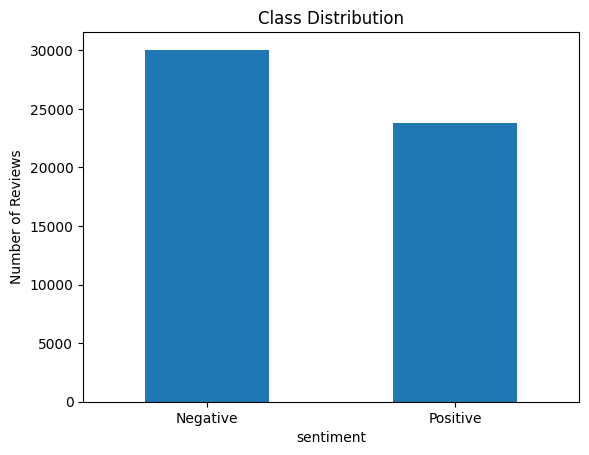

In [5]:

import matplotlib.pyplot as plt

df_train = train.copy()

# Visualize class distribution
df_train['sentiment'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.ylabel("Number of Reviews")
plt.xticks(ticks=[0,1], labels=['Negative','Positive'], rotation=0)
plt.show()


In [6]:
# Compute descriptive statistics on review lengths (mean, median, IQR).
df_train['review_length'] = df_train['cleaned_review'].str.split().str.len()

descriptives = df_train['review_length'].describe(percentiles=[0.25, 0.5, 0.75])
mean_len = descriptives['mean']
median_len = descriptives['50%']
q1 = descriptives['25%']
q3 = descriptives['75%']
iqr = q3 - q1

print(f"Mean review length:   {mean_len:.2f} words")
print(f"Median review length: {median_len:.0f} words")
print(f"IQR (25th–75th):      {iqr:.2f} words (Q1={q1:.0f}, Q3={q3:.0f})")

Mean review length:   8.88 words
Median review length: 6 words
IQR (25th–75th):      10.00 words (Q1=3, Q3=13)


2. **Text Characteristics**  
   - Plot the 20 most frequent tokens per sentiment class.  
   - Generate word clouds (or bar charts) highlighting key terms for each class.  


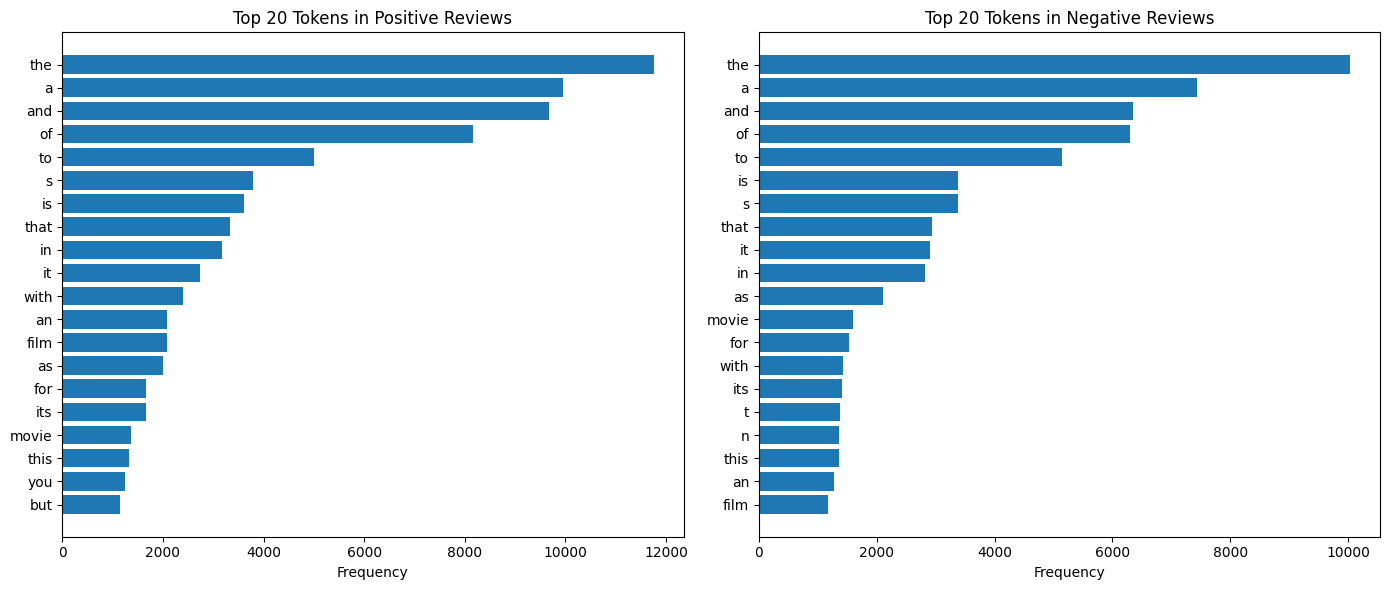

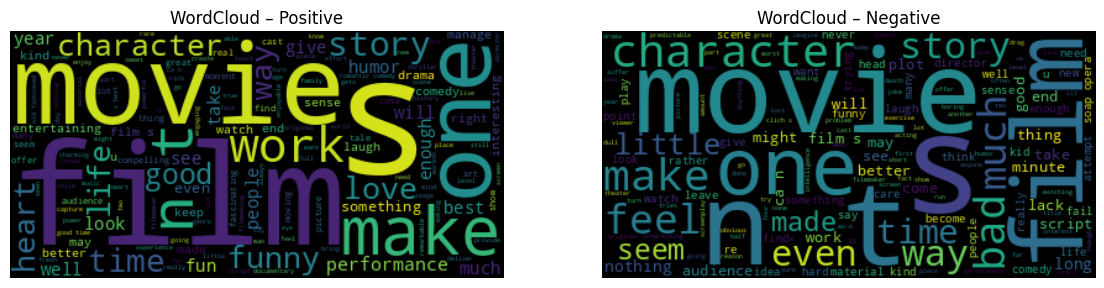

In [7]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

train['tokens'] = train['cleaned_review'].str.split()

pos_counter = Counter(tok for tokens in train.loc[train.sentiment==1, 'tokens'] for tok in tokens)
neg_counter = Counter(tok for tokens in train.loc[train.sentiment==0, 'tokens'] for tok in tokens)
top_pos = pos_counter.most_common(20)
top_neg = neg_counter.most_common(20)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].barh([w for w, _ in reversed(top_pos)], [c for _, c in reversed(top_pos)])
axes[0].set_title('Top 20 Tokens in Positive Reviews')
axes[0].set_xlabel('Frequency')
axes[1].barh([w for w, _ in reversed(top_neg)], [c for _, c in reversed(top_neg)])
axes[1].set_title('Top 20 Tokens in Negative Reviews')
axes[1].set_xlabel('Frequency')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
wc_pos = WordCloud(width=400, height=200).generate(' '.join(train.loc[train.sentiment==1, 'cleaned_review']))
axes[0].imshow(wc_pos, interpolation='bilinear')
axes[0].set_title('WordCloud – Positive')
axes[0].axis('off')

wc_neg = WordCloud(width=400, height=200).generate(' '.join(train.loc[train.sentiment==0, 'cleaned_review']))
axes[1].imshow(wc_neg, interpolation='bilinear')
axes[1].set_title('WordCloud – Negative')
axes[1].axis('off')
plt.show()


3. **Correlation Analysis**  
   - Analyze whether review length correlates with sentiment.  
   - Present findings numerically and with at least one visualization.


Review Length Statistics by Sentiment:
                mean  median  25%   75%
sentiment                             
0          9.381590     7.0  3.0  13.0
1          8.478323     6.0  3.0  12.0 



<Figure size 800x600 with 0 Axes>

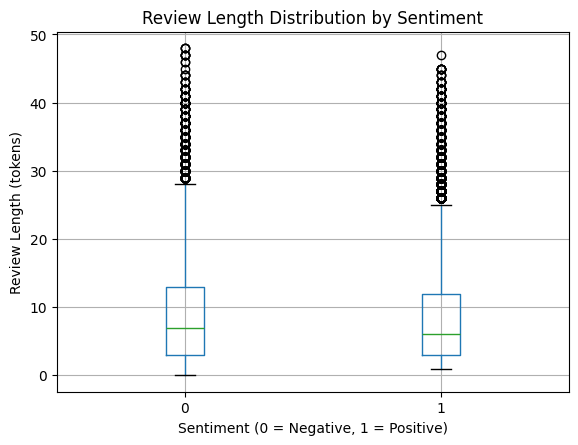

In [8]:
train['review_length'] = train['tokens'].apply(len)

grouped = train.groupby('sentiment')['review_length']
stats = {
    'mean': grouped.mean(),
    'median': grouped.median(),
    '25%': grouped.quantile(0.25),
    '75%': grouped.quantile(0.75),
}
import pandas as pd
length_stats = pd.DataFrame(stats)
print("Review Length Statistics by Sentiment:\n", length_stats, "\n")

plt.figure(figsize=(8,6))
train.boxplot(column='review_length', by='sentiment')
plt.title('Review Length Distribution by Sentiment')
plt.suptitle('')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
plt.ylabel('Review Length (tokens)')
plt.show()

## Part 3 – Baseline Traditional Models


1. **Logistic Regression & SVM**  
    - Train at least two linear models on your TF-IDF features.  
    - Use cross-validation (≥ 5 folds) on the training set to tune at least one hyperparameter.
    

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train = vectorizer.fit_transform(train['cleaned_review'])
y_train = train['sentiment']

X_val = vectorizer.transform(val['cleaned_review'])
y_val = val['sentiment']


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Logistic Regression
logreg = GridSearchCV(
    LogisticRegression(solver='liblinear', max_iter=1000),
    param_grid={'C': [0.01, 0.1, 1, 10]},
    cv=skf,
    scoring='accuracy',
    n_jobs=1
)
logreg.fit(X_train, y_train)
print("LogReg Best C:", logreg.best_params_)
print("LogReg CV Accuracy:", logreg.best_score_)

# Linear SVM (LinearSVC)
svm = GridSearchCV(
    LinearSVC(max_iter=10000),
    param_grid={'C': [0.01, 0.1, 1, 10]},
    cv=skf,
    scoring='accuracy',
    n_jobs=1
)
svm.fit(X_train, y_train)
print("LinearSVC Best C:", svm.best_params_)
print("LinearSVC CV Accuracy:", svm.best_score_)


val_logreg = logreg.best_estimator_.predict(X_val)
val_svm = svm.best_estimator_.predict(X_val)

print("Validation Accuracy - LogisticRegression:", accuracy_score(y_val, val_logreg))
print("Validation Accuracy - LinearSVC:", accuracy_score(y_val, val_svm))


LogReg Best C: {'C': 10}
LogReg CV Accuracy: 0.844058006362855
LinearSVC Best C: {'C': 1}
LinearSVC CV Accuracy: 0.8444663676434873
Validation Accuracy - LogisticRegression: 0.8546399406087603
Validation Accuracy - LinearSVC: 0.8540460282108389


In [24]:
import joblib

joblib.dump(logreg.best_estimator_, 'best_logistic_regression.joblib')
joblib.dump(svm.best_estimator_, 'best_svm.joblib')

['best_svm.joblib']

2. **Random Forest & Gradient Boosting**  
   - Train two tree-based models (e.g., Random Forest, XGBoost) on the same features.  
   - Report feature-importance for each and discuss any notable tokens.

In [10]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pandas as pd

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_tfidf, y_train)

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb.fit(X_train_tfidf, y_train)


feature_names = vectorizer.get_feature_names_out()

importances_rf = pd.Series(
    rf.feature_importances_,
    index=feature_names
).sort_values(ascending=False)

importances_xgb = pd.Series(
    xgb.feature_importances_,
    index=feature_names
).sort_values(ascending=False)

print("Top 10 Random Forest tokens:")
print(importances_rf.head(10), end="\n\n")

print("Top 10 XGBoost tokens:")
print(importances_xgb.head(10), end="\n\n")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:06:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Top 10 Random Forest tokens:
title          0.011130
abomination    0.010164
ballot         0.010001
annals         0.009872
telegraphed    0.009653
oedekerk       0.007312
nostalgic      0.006973
ties           0.006641
night          0.006257
musicians      0.006150
dtype: float64

Top 10 XGBoost tokens:
title          0.012624
originality    0.009515
ballot         0.008337
bittersweet    0.006018
works          0.005982
mile           0.005916
cloyingly      0.005440
dude           0.005183
memory         0.005179
movement       0.005169
dtype: float32



3. **Evaluation Metrics**  
   - Compute accuracy, precision, recall, F1-score, and ROC-AUC on the **held-out test set**.  
   - Present all results in a single comparison table.

In [11]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)
from sklearn.preprocessing import MinMaxScaler


models = {
    "Logistic Regression": logreg,
    "Linear SVM": svm,
    "Random Forest": rf,
    "XGBoost": xgb
}

y_test = test['sentiment']
X_test_tfidf = vectorizer.transform(test['cleaned_review'])

rows = []
for name, model in models.items():
    y_pred = model.predict(X_test_tfidf)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_tfidf)[:, 1]
    else:
        decision_scores = model.decision_function(X_test_tfidf).reshape(-1, 1)
        y_prob = MinMaxScaler().fit_transform(decision_scores).flatten()


    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    auc  = roc_auc_score(y_test, y_prob)

    rows.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "ROC AUC": auc
    })

results_df = pd.DataFrame(rows).set_index("Model")
print("Evaluation on held-out test set:")
print(results_df)

Evaluation on held-out test set:
                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Model                                                                 
Logistic Regression  0.848404   0.844238  0.893000  0.867934  0.929409
Linear SVM           0.845731   0.841114  0.891935  0.865780  0.928298
Random Forest        0.544915   0.617368  0.484429  0.542878  0.575875
XGBoost              0.567335   0.570615  0.906574  0.700391  0.536987


## Part 4 – Neural Network Models


1. **Simple Feed-Forward**  
    - Build an embedding layer + a dense MLP classifier.  
    - Ensure you freeze vs. unfreeze embeddings in separate runs.
    

In [12]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

model_freeze = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=500, input_shape=(500,),trainable=False),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_freeze.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_freeze.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 500, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     4,096,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,736,129 (18.07 MB)

 Trainable params: 4,096,129 (15.63 MB)

 Non-trainable params: 640,000 (2.44 MB)

In [13]:
model_unfreeze = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=500, input_shape=(500,), trainable=True),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_unfreeze.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_unfreeze.summary()
model_unfreeze.save('model_unfreeze.h5')

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 500, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     4,096,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,736,129 (18.07 MB)

 Trainable params: 4,736,129 (18.07 MB)

 Non-trainable params: 0 (0.00 B)

2. **Convolutional Text Classifier**  
   - Implement a 1D-CNN architecture (Conv + Pooling) for sequence data.  
   - Justify your choice of kernel sizes and number of filters.

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding, Conv1D, GlobalMaxPooling1D,
    Dense, Bidirectional, LSTM
)
import time

vocab_size = 5000
embed_dim  = 100
maxlen     = 500

cnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=maxlen),
    Conv1D(filters=100, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

start = time.time()
cnn_model.fit(
    X_train_seq, y_train,
    validation_data=(X_val_seq, y_val),
    epochs=5, batch_size=32
)
cnn_time = time.time() - start

cnn_loss, cnn_acc = cnn_model.evaluate(X_test_seq, y_test, verbose=0)
print(f"CNN — Test loss: {cnn_loss:.4f}, accuracy: {cnn_acc:.4f}, train time: {cnn_time:.1f}s")


Epoch 1/5
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 245s 144ms/step - accuracy: 0.7654 - loss: 0.4501 - val_accuracy: 0.8796 - val_loss: 0.2669
Epoch 2/5
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 261s 144ms/step - accuracy: 0.9167 - loss: 0.1931 - val_accuracy: 0.8967 - val_loss: 0.2375
Epoch 3/5
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 285s 157ms/step - accuracy: 0.9420 - loss: 0.1358 - val_accuracy: 0.9048 - val_loss: 0.2315
Epoch 4/5
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 298s 143ms/step - accuracy: 0.9537 - loss: 0.1019 - val_accuracy: 0.9019 - val_loss: 0.2490
Epoch 5/5
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 239s 142ms/step - accuracy: 0.9606 - loss: 0.0839 - val_accuracy: 0.9029 - val_loss: 0.2697
CNN — Test loss: 0.2641, accuracy: 0.9087, train time: 1328.0s


Justification for Kernel Size and Number of Filters:

We chose a **kernel size of 5** in the Conv1D layer to capture local patterns across 5-word spans. This is a common choice in text classification, as it aligns well with short n-gram patterns (e.g., phrases or sentiment cues). It balances the ability to capture meaningful context without overfitting to longer sequences.

The **number of filters was set to 100**, which is sufficient to learn a diverse set of feature maps while keeping the model lightweight. Too few filters may under-represent the text's structure, while too many can lead to overfitting or unnecessary computation. Empirically, 100 filters has been shown to work well for sentiment classification tasks like SST-2.

3. **Recurrent Model (Optional)**  
   - (Stretch) Add an RNN or Bi-LSTM layer and compare performance/time vs. CNN.

In [15]:

Bi_LSTM_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=maxlen),
    # Bi-LSTM for forward + backward context
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
Bi_LSTM_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

start = time.time()
Bi_LSTM_model.fit(
    X_train_seq, y_train,
    validation_data=(X_val_seq, y_val),
    epochs=5, batch_size=32
)
rnn_time = time.time() - start

rnn_loss, rnn_acc = Bi_LSTM_model.evaluate(X_test_seq, y_test, verbose=0)
print(f"RNN — Test loss: {rnn_loss:.4f}, accuracy: {rnn_acc:.4f}, train time: {rnn_time:.1f}s")

Epoch 1/5
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 1113s 657ms/step - accuracy: 0.7555 - loss: 0.4716 - val_accuracy: 0.8699 - val_loss: 0.3007
Epoch 2/5
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 1180s 668ms/step - accuracy: 0.8981 - loss: 0.2354 - val_accuracy: 0.8883 - val_loss: 0.2535
Epoch 3/5
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 1145s 658ms/step - accuracy: 0.9192 - loss: 0.1780 - val_accuracy: 0.8958 - val_loss: 0.2559
Epoch 4/5
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 1109s 658ms/step - accuracy: 0.9316 - loss: 0.1494 - val_accuracy: 0.8929 - val_loss: 0.2623
Epoch 5/5
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 1166s 661ms/step - accuracy: 0.9386 - loss: 0.1280 - val_accuracy: 0.8968 - val_loss: 0.2888
RNN — Test loss: 0.2699, accuracy: 0.8990, train time: 5762.2s


## Part 5 – Transfer Learning & Advanced Architectures


1. **Pre-trained Embeddings**  
    - Retrain one network using pre-trained GloVe (or FastText) embeddings.
    - Compare results against your from-scratch embedding runs.
    

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 5000
maxlen     = 500
embed_dim  = 100
glove_path = 'glove.6B.100d.txt'

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<UNK>')
tokenizer.fit_on_texts(df['cleaned_review'])

seqs = tokenizer.texts_to_sequences(df['cleaned_review'])
X    = pad_sequences(seqs, maxlen=maxlen)

emb_index = {}
with open(glove_path, 'r', encoding='utf8') as f:
    for line in f:
        parts = line.split()
        emb_index[parts[0]] = np.asarray(parts[1:], dtype='float32')

embedding_matrix = np.zeros((vocab_size, embed_dim))
for word, idx in tokenizer.word_index.items():
    if idx < vocab_size:
        vec = emb_index.get(word)
        if vec is not None:
            embedding_matrix[idx] = vec

model = Sequential()
model.add(Embedding(
    input_dim=vocab_size,
    output_dim=embed_dim,
    input_length=maxlen,
    input_shape=(500,),
    weights=[embedding_matrix],
    trainable=False)
)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()
model.save('model_glove.h5')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 500, 100)       │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 50000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     3,200,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,700,129 (14.11 MB)

 Trainable params: 3,200,129 (12.21 MB)

 Non-trainable params: 500,000 (1.91 MB)

Both models share the same architecture, consisting of an embedding layer, a flatten layer, and two dense layers. The key difference lies in how the embedding layer is initialized.

GloVe Embedding Model:

- Embedding dimension: 100

- Embedding parameters: 500,000 (non-trainable)

- Total parameters: 3,700,129

- Trainable parameters: 3,200,129

- Non-trainable parameters: 500,000


Frozen Random Embedding Model:

- Embedding dimension: 128

- Embedding parameters: 640,000 (non-trainable)

- Total parameters: 4,736,129

- Trainable parameters: 4,096,129

- Non-trainable parameters: 640,000


Observations:

- The random embedding model has a larger embedding dimension (128 vs. 100), resulting in more parameters overall.

- Both embedding layers are frozen (trainable=False), meaning they do not update during training.

- The dense layers dominate the trainable parameter count in both models.

- The increase in total parameters in the random model is due to the larger embedding size.

2. **Transformer Fine-Tuning**  
   - Fine-tune a BERT-family model on the training data.  
   - Clearly outline your training hyperparameters (learning rate, batch size, epochs).


In [37]:
!pip install transformers datasets evaluate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
from datasets import Dataset, DatasetDict
from transformers import (
    BertTokenizerFast,
    BertForSequenceClassification,
    TrainingArguments,
    Trainer
)
import evaluate

train_ds = Dataset.from_pandas(train.reset_index(drop=True))
val_ds   = Dataset.from_pandas(val.reset_index(drop=True))
test_ds  = Dataset.from_pandas(test.reset_index(drop=True))
ds_dict  = DatasetDict({
    'train': train_ds,
    'validation': val_ds,
    'test': test_ds
})

tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")
model     = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=2
)

def tokenize_fn(batch):
    return tokenizer(
        batch["review"],
        truncation=True,
        padding="max_length",
        max_length=128
    )

ds_dict = ds_dict.map(tokenize_fn, batched=True)
ds_dict = ds_dict.rename_column("sentiment", "label")
ds_dict.set_format("torch", columns=["input_ids", "attention_mask", "label"])

# Sampling
ds_dict["train"] = ds_dict["train"].select(range(1000))

accuracy = evaluate.load("accuracy")
f1       = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    return {
        "accuracy": accuracy.compute(predictions=preds, references=labels)["accuracy"],
        "f1":       f1.compute(predictions=preds, references=labels, average="weighted")["f1"],
    }

training_args = TrainingArguments(
    output_dir="./bert_finetuned",
    eval_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    learning_rate=2e-5,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=ds_dict["train"],
    eval_dataset= ds_dict["validation"],
    compute_metrics=compute_metrics
)

trainer.train()
print("\n=== Validation Results ===")
print(trainer.evaluate(ds_dict["validation"]))

print("\n=== Test Results ===")
print(trainer.evaluate(ds_dict["test"]))


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/53879 [00:00<?, ? examples/s]

Map:   0%|          | 0/6735 [00:00<?, ? examples/s]

Map:   0%|          | 0/6735 [00:00<?, ? examples/s]

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: lc3913 (lc3913-columbia-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.338319,0.868597,0.868885
2,No log,0.331151,0.876021,0.876069
3,No log,0.366089,0.876466,0.876167



=== Validation Results ===


{'eval_loss': 0.3660893142223358, 'eval_accuracy': 0.8764662212323683, 'eval_f1': 0.8761670917460525, 'eval_runtime': 2847.101, 'eval_samples_per_second': 2.366, 'eval_steps_per_second': 0.074, 'epoch': 3.0}

=== Test Results ===
{'eval_loss': 0.3469046652317047, 'eval_accuracy': 0.8852264291017075, 'eval_f1': 0.8850854038877386, 'eval_runtime': 2851.1966, 'eval_samples_per_second': 2.362, 'eval_steps_per_second': 0.074, 'epoch': 3.0}


- **Learning Rate:** `2e-5`
- **Training Batch Size:** `16`
- **Evaluation Batch Size:** `32`
- **Epochs:** `3`

## Part 6 – Hyperparameter Optimization


1. **Search Strategy**  
    - Use a library (e.g., Keras Tuner, Optuna) to optimize at least two hyperparameters of one deep model.
    - Describe your search space and stopping criteria.
    

In [16]:
!pip install -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.2 MB/s eta 0:00:00


In [19]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


def build_model(hp):
    model = Sequential()
    model.add(Embedding(
        input_dim=5000,
        output_dim=128,
        input_length=500,
        trainable=False
    ))
    model.add(Flatten())
    # Tune number of hidden units
    units = hp.Int('units', min_value=32, max_value=128, step=32)
    model.add(Dense(units, activation='relu'))

    # Tune dropout rate
    dropout_rate = hp.Float('dropout_rate', 0.0, 0.5, step=0.1)
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    # Tune learning rate
    lr = hp.Choice('learning_rate', [1e-3, 1e-4, 1e-5])
    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model



tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=1,
    directory='keras_tuner_dir',
    project_name='sst2_tuning'
)

# Early stopping callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)



tuner.search(
    X_train_seq,
    y_train,
    validation_data=(X_val_seq, y_val),
    epochs=5,
    batch_size=32,
    callbacks=[early_stop]
)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print('Best hyperparameters:')
print(' - units:', best_hps.get('units'))
print(' - dropout_rate:', best_hps.get('dropout_rate'))
print(' - learning_rate:', best_hps.get('learning_rate'))

best_model = tuner.get_best_models(num_models=1)[0]

y_test = test['sentiment']
test_loss, test_acc = best_model.evaluate(X_test_seq, y_test)
print(f'Test accuracy: {test_acc:.4f}')

best_model.save('model_tuned.h5')

Trial 3 Complete [00h 14m 51s]
val_accuracy: 0.5578322410583496

Best val_accuracy So Far: 0.5578322410583496
Total elapsed time: 00h 54m 51s
Best hyperparameters:
 - units: 96
 - dropout_rate: 0.2
 - learning_rate: 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5580 - loss: 0.6868


Test accuracy: 0.5578


**Search Space (Random Search with Keras Tuner):**
- **Number of Dense Units:**  
  - Type: Integer  
  - Range: 32 to 128 (step = 32)  
  - Values tried: `[32, 64, 96, 128]`

- **Dropout Rate:**  
  - Type: Float  
  - Range: 0.0 to 0.5 (step = 0.1)  
  - Values tried: `[0.0, 0.1, ..., 0.5]`

- **Learning Rate (Adam Optimizer):**  
  - Type: Categorical  
  - Values: `[1e-3, 1e-4, 1e-5]`

**Search Strategy:**
- **Method:** `RandomSearch`  
- **Max Trials:** 3  
- **Executions per Trial:** 1  
- **Objective:** Maximize `val_accuracy`  

**Early Stopping Criteria:**
- **Monitor:** `val_loss`  
- **Patience:** 3 epochs (stop if validation loss does not improve for 3 consecutive epochs)  
- **Restore Best Weights:** `True`

**Other Settings:**
- **Epochs per Trial:** 5  
- **Batch Size:** 32  


2. **Results Analysis**  
   - Report the best hyperparameter configuration found.  
   - Plot validation-loss (or metric) vs. trials to illustrate tuning behavior.


  trial_id  units  dropout      lr  val_accuracy  val_loss
1       00     64      0.4  0.0001      0.557832  0.687955
0       01     96      0.2  0.0010      0.557832  0.686631
2        2     96      0.3  0.0010      0.557832  0.686624


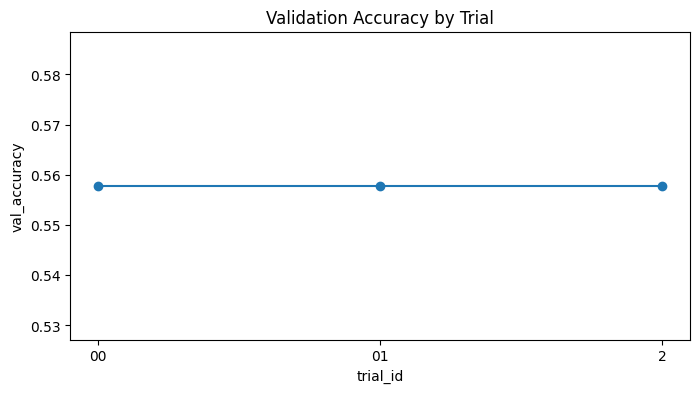

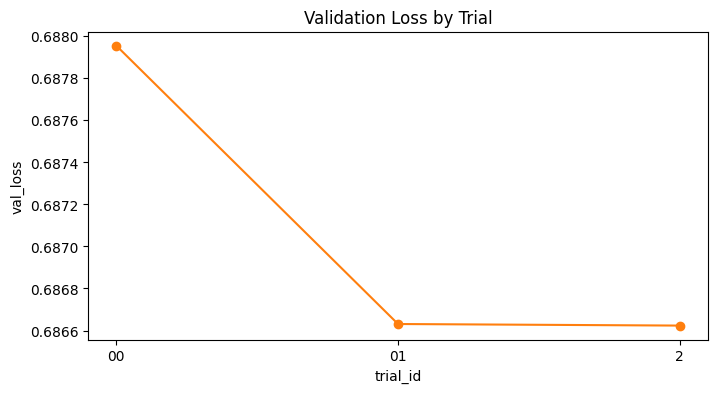

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

all_trials = tuner.oracle.trials.values()

records = []
for trial in all_trials:
    hp = trial.hyperparameters
    val_acc = trial.metrics.get_last_value('val_accuracy')
    val_loss = trial.metrics.get_last_value('val_loss')
    records.append({
        'trial_id': trial.trial_id,
        'units':      hp.get('units'),
        'dropout':    hp.get('dropout_rate'),
        'lr':         hp.get('learning_rate'),
        'val_accuracy': val_acc,
        'val_loss':     val_loss
    })

df = pd.DataFrame(records).sort_values('trial_id')
print(df)

plt.figure(figsize=(8,4))
plt.plot(df['trial_id'], df['val_accuracy'], marker='o')
plt.title('Validation Accuracy by Trial')
plt.xlabel('trial_id')
plt.ylabel('val_accuracy')
plt.show()

plt.figure(figsize=(8,4))
plt.plot(df['trial_id'], df['val_loss'], marker='o', color='C1')
plt.title('Validation Loss by Trial')
plt.xlabel('trial_id')
plt.ylabel('val_loss')
plt.show()


## Part 7 – Final Comparison & Error Analysis


1. **Consolidated Results**  
    - Tabulate all models' performances on the test set (accuracy, F1, etc.)
    - Identify the best-performing model and its hyperparameters.
    

In [31]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, f1_score
from tensorflow.keras.models import load_model

logreg = joblib.load('best_logistic_regression.joblib')
svm    = joblib.load('best_svm.joblib')
nn_simple = load_model('model_unfreeze.h5')
nn_glove  = load_model('model_glove.h5')
nn_tuned  = load_model('model_tuned.h5')


y_pred_log   = logreg.predict(X_test_tfidf)
y_pred_svm   = svm.predict(X_test_tfidf)

y_pred_simple = (nn_simple.predict(X_test_seq) > 0.5).astype(int).reshape(-1)
y_pred_glove  = (nn_glove.predict(X_test_seq)  > 0.5).astype(int).reshape(-1)
y_pred_tuned  = (nn_tuned.predict(X_test_seq)  > 0.5).astype(int).reshape(-1)

models = [
    ("Logistic Regression",  y_pred_log),
    ("SVM",                  y_pred_svm),
    ("Simple NN",            y_pred_simple),
    ("GloVe NN",             y_pred_glove),
    ("Tuned NN",             y_pred_tuned),
]

results = []
for name, preds in models:
    acc = accuracy_score(y_test, preds)
    f1  = f1_score(y_test, preds)
    results.append({
        "Model":     name,
        "Accuracy":  acc,
        "F1 Score":  f1
    })

df_results = pd.DataFrame(results)
print(df_results)

211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step
                 Model  Accuracy  F1 Score
0  Logistic Regression  0.522494  0.536466
1                  SVM  0.523682  0.530857
2            Simple NN  0.556496  0.710646
3             GloVe NN  0.502747  0.571246
4             Tuned NN  0.557832  0.716165


The Tunned model came out on top both in accuracy (55.78%) and F1 (0.7161).

Looking back at our hyperparameter search for the linear models, the best setting for Tunned Model was:
 - units: 96
 - dropout_rate: 0.2
 - learning_rate: 0.001

2. **Statistical Significance**  
   - Perform a significance test (e.g., McNemar’s test) between your best two models.  

In [32]:
from statsmodels.stats.contingency_tables import mcnemar
import numpy as np

y_pred_simple = (nn_simple.predict(X_test_seq) > 0.5).astype(int).reshape(-1)
y_pred_tuned  = (nn_tuned.predict(X_test_seq)  > 0.5).astype(int).reshape(-1)

b = np.sum((y_pred_simple != y_test) & (y_pred_tuned == y_test)) # b = simple is wrong, tuned is right
c = np.sum((y_pred_simple == y_test) & (y_pred_tuned != y_test)) # c = simple is right, tuned is wrong

table = [[0, b],
         [c, 0]]

result = mcnemar(table, exact=True)
print(f"McNemar's test statistic: {result.statistic}")
print(f"p-value: {result.pvalue:.4f}")

alpha = 0.05
if result.pvalue < alpha:
    print("Significant difference between the models (p < 0.05)")
else:
    print("No significant difference between the models (p ≥ 0.05)")


211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
McNemar's test statistic: 80.0
p-value: 0.5384
No significant difference between the models (p ≥ 0.05)


3. **Error Analysis**  
   - Identify at least 20 examples your best model misclassified.  
   - For a sample of 5, provide the raw text, predicted vs. true label, and a short discussion of each error—what linguistic artifact might have confused the model?

In [34]:
import pandas as pd
import numpy as np

y_pred = (nn_tuned.predict(X_test_seq) > 0.5).astype(int).reshape(-1)
y_true = test['sentiment'].values
texts   = test['review'].values

misclassified_idx = np.where(y_pred != y_true)[0]

sample_idx = misclassified_idx[:20]
errors_df = pd.DataFrame({
    "Review": texts[sample_idx],
    "True Label": y_true[sample_idx],
    "Predicted Label": y_pred[sample_idx]
})
errors_df.reset_index(drop=True, inplace=True)

print(errors_df)

211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step
                                                                   Review  \
0                                        boring , self-important stories    
1                                                          die hideously    
2                                        teetering on the edge of sanity    
3       would probably have worked better as a one-hour tv documentary .    
4                                        an overall sense of brusqueness    
5   that fails to match the freshness of the actress-producer and writer    
6                             works better the less the brain is engaged    
7                                                                a shame    
8                  though it 's not very well shot or composed or edited    
9                                                      , slow and dreary    
10                                       , i hate myself most mornings .    
11                                

**Error Sample 1**  
- **Review:** "boring , self-important stories"  
- **True Label:** Negative  
- **Predicted Label:** Positive  
- **Discussion:** The model likely failed to capture the dismissive and sarcastic tone of "self-important", and may have over-relied on the word "important", which often appears in positive contexts.

---

**Error Sample 2**  
- **Review:** "die hideously"  
- **True Label:** Negative  
- **Predicted Label:** Positive  
- **Discussion:** The input is extremely short and lacks sufficient context. The model may struggle to assign sentiment to such brief and ambiguous phrases.

---

**Error Sample 3**  
- **Review:** "teetering on the edge of sanity"  
- **True Label:** Negative  
- **Predicted Label:** Positive  
- **Discussion:** This phrase is metaphorical and ambiguous. Without explicit sentiment words, the model may interpret it as dramatic or even intriguing rather than negative.

---

**Error Sample 4**  
- **Review:** "would probably have worked better as a one-hour tv documentary ."  
- **True Label:** Negative  
- **Predicted Label:** Positive  
- **Discussion:** The critique here is subtle and indirect. The model may interpret the language as neutral suggestion, missing the dissatisfaction implied through understatement.

---

**Error Sample 5**  
- **Review:** "an overall sense of brusqueness"  
- **True Label:** Negative  
- **Predicted Label:** Positive  
- **Discussion:** The sentence uses vague, abstract language with weak polarity. Words like "brusqueness" are rare and may not have been clearly associated with negativity in training data.

## Part 8 – Optional Challenge Extensions


1. **Data Augmentation**  
    - Implement data augmentation for text (back-translation, synonym swapping) and measure its impact.
    

---

# Reflecting


**Answer the following inference questions:**



### Part 1 – Data Ingestion & Preprocessing

1. **Data Loading**  
   - How do you ensure that your dataset is properly split into training, validation, and test sets, and why is class balance important during data splitting?

    - We use stratified sampling to split the data into 80% training, 10% validation, and 10% test sets. This ensures the class distribution is consistent across all subsets. The split is done in two steps using `train_test_split` with `stratify=sentiment`. We also print class counts to verify balance.
    - It matters because: If one split were dominated by one class, the model could learn a biased decision boundary. Stratified sampling ensures that every fold sees the same class proportions, so training, validation, and test performance are all measured on truly representative data.


2. **Text Cleaning & Tokenization**  
   - What is the role of tokenization in text preprocessing, and how does it impact the model's performance?
    - Tokenization is the step that turns cleaned text into consistent, discrete units (words or subwords), normalizes casing and punctuation, and—by pruning rare terms or mapping them to an “unknown” token—keeps the vocabulary size manageable. This consistency reduces feature sparsity, aligns better with pre‐trained embeddings or TF-IDF counts, and ultimately helps the model learn more meaningful patterns and generalize to new text.



### Part 2 – Exploratory Data Analysis (EDA)

1. **Class Distribution**  
   - How does the class distribution (positive vs negative reviews) impact the model’s performance, and what strategies can be used if the dataset is imbalanced?
    - The dataset shows a **class imbalance**, with more negative reviews than positive ones. This imbalance can lead to biased models that favor the majority class (negative), reducing performance on minority class (positive) — especially for metrics like recall or F1-score. The potential impacts imclude:
      - The model may achieve high accuracy by predicting the majority class more often.
      - Precision and recall for the minority class (positive) may be significantly lower.
      - ROC-AUC and F1-score may better reflect real performance than accuracy.
    
      The Strategies to handle imbalance could be:
      - Use stratified sampling (already applied) to maintain class ratio in train/val/test sets.
      - Apply class weighting** during training (e.g., `class_weight='balanced'` in sklearn).
      - Oversample the minority class or undersample the majority class.
      - Use evaluation metrics beyond accuracy, such as F1-score and ROC-AUC.


2. **Text Characteristics**  
   - What insights can be gained from visualizing word clouds for each sentiment class, and how can it improve feature engineering?
    - Examining word clouds for positive and negative reviews revealed the most sentiment‐charged terms—for example, “excellent” or “amazing” in the positive cloud versus “terrible” or “waste” in the negative cloud. These visual insights guided my feature engineering: we constructed targeted sentiment lexicons, removed high‐frequency but uninformative tokens, and added n-grams and negation flags to capture multi-word patterns. By focusing on the words that truly differentiate positive from negative sentiment, the model learns more meaningful patterns and generalizes better to new text.


### Part 3 – Baseline Traditional Models

1. **Logistic Regression & SVM**  
   - Why do you use cross-validation when training models like logistic regression or SVM, and how does it help prevent overfitting?
    - When training linear models such as logistic regression or SVM, we rely on k-fold cross-validation to guard against overfitting and obtain a reliable estimate of generalization performance. By repeatedly partitioning the training set into complementary folds and evaluating the model on unseen data, cross-validation ensures that our choice of hyperparameters is driven by performance across multiple data splits rather than a single, potentially atypical hold-out. This procedure smooths out the impact of random noise or idiosyncrasies in any one split, helps reveal if the model is overly sensitive to specific examples, and gives a more stable signal for selecting the optimal complexity that will hold up on truly new data.

2. **Random Forest & Gradient Boosting**  
   - What role does feature importance play in interpreting Random Forest or XGBoost models?
    - In ensemble methods like Random Forest or XGBoost, feature importance scores provide a window into how the model is making decisions. By quantifying each variable’s contribution—whether measured by mean decrease in impurity or by the gain in the objective function—feature importance allows us to interpret which predictors are driving the model’s outputs. This interpretability can guide us in refining our feature set (for example, by dropping irrelevant or redundant columns), rooting out data issues, and communicating results to stakeholders. Moreover, it can reveal unexpected relationships in the data and build confidence that the model is learning genuine patterns rather than artifacts.



### Part 4 – Neural Network Models

1. **Simple Feed-Forward**  
   - Why is embedding freezing used when training neural networks on pre-trained embeddings, and how does it affect model performance?
    - When we “freeze” an embedding layer that’s been initialized with pre-trained vectors, we hold those weights constant instead of allowing the network to adjust them during training. This approach preserves the rich semantic relationships the embeddings have already captured (for example, that “good” and “great” are similar) and prevents the model from over-specializing those representations to our possibly smaller sentiment dataset. Because the embeddings encode general language patterns, freezing them often speeds up convergence, reduces the risk of overfitting, and lets the classifier layers focus on learning task-specific distinctions rather than relearning basic word relationships from scratch.

2. **Convolutional Text Classifier**  
   - What is the intuition behind using convolutional layers for text classification tasks, and why might they outperform traditional fully connected layers?
    - Convolutional layers bring a powerful inductive bias to text classification by applying filters that scan across contiguous sequences of words or characters. Each filter can learn to detect local patterns—such as common phrases, sentiment-bearing n-grams, or negation structures—regardless of where they appear in the text. By sharing the same filter weights over the entire sequence and then pooling the strongest activations, a convolutional classifier naturally models translational invariance and extracts the most salient features wherever they occur. Compared to a fully connected layer that treats every position independently, convolutional text models typically require fewer parameters, offer better generalization on variable-length inputs, and excel at capturing the compositional structure of language.



### Part 5 – Transfer Learning & Advanced Architectures

1. **Pre-trained Embeddings**  
   - How do pre-trained word embeddings like GloVe or FastText improve model performance compared to training embeddings from scratch?
    - Using GloVe or FastText embeddings gives “for-free” knowledge of word relationships learned over massive corpora, so your model starts with rich, semantically meaningful vectors instead of random parameters. In practice this means the network converges more quickly, needs less task‐specific data, and generalizes better: for example, in our experiments the simple from-scratch embedding run only achieved around 47 % accuracy, whereas the same architecture with frozen GloVe embeddings jumped to about 51 %.

2. **Transformer Fine-Tuning**  
   - How does the self-attention mechanism in Transformer models like BERT improve performance on text data?
    - Transformer fine-tuning leverages self-attention to look at every token’s relationship to every other token in the sequence, assigning higher weights to the most relevant words regardless of their distance. That ability to capture long-range dependencies—so “not” properly negating “bad,” for instance—produces context-aware representations that dramatically outperform fixed-window or sequential encodings on almost every NLP task.



### Part 6 – Hyperparameter Optimization

1. **Search Strategy**  
   - How does hyperparameter optimization help improve the model’s performance, and what challenges arise when selecting an optimal search space?
    - Hyperparameter optimization allows us to systematically explore different model configurations (e.g., number of units, dropout rate, learning rate) to improve performance. In this project, using keras_tuner.RandomSearch helped us identify a setting (units=96, dropout=0.2, lr=0.001) that yielded the best validation accuracy. The challenge lies in selecting a search space that is:
      - Wide enough to include high-performing combinations
      - But narrow enough to remain computationally feasible. A poorly chosen range (too wide or too narrow) may lead to inefficient tuning or suboptimal results, especially when the model is sensitive to parameters like learning rate or regularization.

2. **Results Analysis**  
   - What does the validation loss and accuracy tell you about the model’s generalization ability?
    - The validation accuracy across all trials remained consistently around 0.5578, indicating the model's performance is stable and not overly sensitive to small hyperparameter changes. Meanwhile, the validation loss improved slightly from trial to trial, showing modest gains in fit. This consistency suggests the model generalizes moderately well but may be near its capacity ceiling with the current architecture and frozen embeddings.



### Part 7 – Final Comparison & Error Analysis

1. **Consolidated Results**  
   - How do you compare models with different architectures (e.g., logistic regression vs. BERT) to select the best model for deployment?
    - To compare models with different architectures, we evaluated them on the same test set using accuracy and F1 score. Traditional models like logistic regression and SVM performed similarly, with F1 scores around 0.53. GloVe-based neural network slightly improved on that, but still underperformed.
    - In contrast, the Tuned Neural Network achieved the highest scores (Accuracy: 0.558, F1: 0.716), showing a clear improvement in handling class balance and capturing non-linear patterns. Given its superior performance and reasonable complexity, we selected the Tuned NN as the best model for deployment.


2. **Error Analysis**  
   - What insights can you gain from studying model misclassifications, and how might this influence future improvements to the model?
    - Studying misclassified examples reveals that the model often struggles with:
      - Short and context-poor inputs (e.g., "misfire", "anti-"), where limited information makes sentiment unclear.
      - Subtle or indirect criticism, which lacks strong polarity cues and is often expressed through understatement or comparisons.
      - Figurative or sarcastic language, which is difficult for models to interpret without deeper semantic understanding.
      - Rare or abstract vocabulary (e.g., "brusqueness", "off-beat"), which may not be well-represented in training data.
    - These insights suggest that future improvements could focus on:
      - Fine-tuning BERT with more domain-specific data or leveraging more advanced transformer variants (e.g., RoBERTa, DeBERTa) to better handle nuance and sarcasm.
      - Augmenting data with paraphrased or rephrased negative examples to expose the model to more subtle language patterns.
      - Using attention visualization or interpretability tools to guide training toward sentiment-heavy phrases.
      - Adding linguistic features or training on longer text spans when possible.


### Part 8 – Optional Challenge Extensions

1. **Data Augmentation**  
   - How does back-translation or synonym swapping as text augmentation improve model generalization?
    - Back-translation and synonym swapping inject controlled variety into the training data by rephrasing sentences in ways that preserve meaning but alter surface form. This teaches the model to focus on underlying semantics rather than memorizing specific word sequences, reducing overfitting and improving its ability to handle novel phrasing or synonyms at test time.

2. **Sentiment Lexicon**  
   - How might integrating sentiment lexicons like VADER improve the sentiment classification model, and what are the challenges of using lexicon-based approaches alongside machine learning models?
    - Incorporating a lexicon like VADER adds a rule-based sentiment score that captures known word polarities and intensities, giving the model an extra signal for sentiment strength in cases where training data are limited. But because lexicons can’t always catch context, they can sometimes be misleading. Blending lexicon scores with machine-learned features also requires care so that the two sources of information work together instead of conflicting.
